## 1. 데이터 수집

In [2]:
import pandas as pd
import shutil
import os

In [3]:
df = pd.read_csv("dataset/네이버뉴스_사회_인권복지 .csv",index_col=0)

In [4]:
df

,날짜,헤드라인
0,20220101,새해 첫날 남아공 투투 대주교 장례식 엄수…비오고 맑아 '축복'(종합)
1,20220101,"이준석 ""국민의힘, 동백꽃의 아픔 지닌 분들과 함께할 것""(종합)"
2,20220101,0~9세 코로나 확진자 1주간 4600여명 늘었다…미접종 사각지대 '불안'
3,20220101,고령층 77.2% 3차 접종···3차 접종률은 전체 인구 35.9%
4,20220101,돌파 감염까지…광주서 또다시 외국인 집단감염 기로
...,...,...
10223,20220324,성범죄 피해 청소년 평균 14세…가해자 66%가 지인
10224,20220324,"노인도 '셀프 재택치료'…""응급상황에 중환자들 어쩌나"""
10225,20220324,"""효능 낮아도 처방 대상 넓다"" 먹는 치료제 '라게브리오' 사망 억제할까"
10226,20220324,"[결혼 안 하는 MZ]②""그래 너 알아서하렴""…부모도 독촉 않고 결혼관 존중"


## 2. 데이터 전처리

### NULL 값 처리하기.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10228 entries, 0 to 10227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      10228 non-null  int64 
 1   헤드라인    10225 non-null  object
dtypes: int64(1), object(1)
memory usage: 239.7+ KB


In [6]:
df[df['헤드라인'].isnull()]

,날짜,헤드라인
6077,20220221,NaN
9543,20220320,NaN
10198,20220324,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10225 entries, 0 to 10227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      10225 non-null  int64 
 1   헤드라인    10225 non-null  object
dtypes: int64(1), object(1)
memory usage: 239.6+ KB


In [9]:
df[df['헤드라인'].isnull()]

,날짜,헤드라인


In [10]:
df.reset_index(inplace=True, drop=True)

### 중복값 제거하기

In [11]:
# 모든 중복값 찾기
df[df['헤드라인'].duplicated(keep=False) == True]

,날짜,헤드라인
57,20220102,법무부 인권국장에 변협 인권위원 출신 위은진 변호사
67,20220102,법무부 인권국장에 변협 인권위원 출신 위은진 변호사
128,20220103,기재부 장애인권리예산 반영 촉구 기자회견
129,20220103,기재부 장애인권리예산 반영 촉구 기자회견
130,20220103,'장애인 탈시설 예산 보장하라'
...,...,...
10085,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회
10086,20220324,"""발달장애인 24시간 지원체계 구축하라"" 구호 외치는 참석자들"
10087,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회
10088,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회


In [12]:
# 첫번째 중복값은 포함하지 않기
df[df['헤드라인'].duplicated(keep='first') == True]

,날짜,헤드라인
67,20220102,법무부 인권국장에 변협 인권위원 출신 위은진 변호사
129,20220103,기재부 장애인권리예산 반영 촉구 기자회견
131,20220103,'장애인 탈시설 예산 보장하라'
133,20220103,장애인단체 기자회견에 경찰 배치된 광화문역
134,20220103,장애인단체 기자회견에 경찰 배치된 광화문역
...,...,...
10085,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회
10086,20220324,"""발달장애인 24시간 지원체계 구축하라"" 구호 외치는 참석자들"
10087,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회
10088,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회


In [13]:
# 마지막 중복값은 포함하지 않기
df[df['헤드라인'].duplicated(keep='last') == True]

,날짜,헤드라인
57,20220102,법무부 인권국장에 변협 인권위원 출신 위은진 변호사
128,20220103,기재부 장애인권리예산 반영 촉구 기자회견
130,20220103,'장애인 탈시설 예산 보장하라'
132,20220103,장애인단체 기자회견에 경찰 배치된 광화문역
133,20220103,장애인단체 기자회견에 경찰 배치된 광화문역
...,...,...
10083,20220324,"""발달장애인 24시간 지원체계 구축하라"" 구호 외치는 참석자들"
10084,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회
10085,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회
10087,20220324,발달장애인 24시간 지원체계 구축 촉구 집중 결의대회


In [14]:
df[df['헤드라인'].duplicated(keep='first') == True].index

Int64Index([   67,   129,   131,   133,   134,   145,   146,   148,   149,
              151,
            ...
             9964,  9965, 10008, 10082, 10083, 10085, 10086, 10087, 10088,
            10089],
           dtype='int64', length=381)

In [15]:
df.drop(df[df['헤드라인'].duplicated(keep='first') == True].index, axis=0, inplace=True)

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
df

,날짜,헤드라인
0,20220101,새해 첫날 남아공 투투 대주교 장례식 엄수…비오고 맑아 '축복'(종합)
1,20220101,"이준석 ""국민의힘, 동백꽃의 아픔 지닌 분들과 함께할 것""(종합)"
2,20220101,0~9세 코로나 확진자 1주간 4600여명 늘었다…미접종 사각지대 '불안'
3,20220101,고령층 77.2% 3차 접종···3차 접종률은 전체 인구 35.9%
4,20220101,돌파 감염까지…광주서 또다시 외국인 집단감염 기로
...,...,...
9839,20220324,성범죄 피해 청소년 평균 14세…가해자 66%가 지인
9840,20220324,"노인도 '셀프 재택치료'…""응급상황에 중환자들 어쩌나"""
9841,20220324,"""효능 낮아도 처방 대상 넓다"" 먹는 치료제 '라게브리오' 사망 억제할까"
9842,20220324,"[결혼 안 하는 MZ]②""그래 너 알아서하렴""…부모도 독촉 않고 결혼관 존중"


## 3. 형태소 분석

### OKT 사용해보기

In [18]:
# KONLPY의 OKT 형태소 분석기를 불러오고 이를 okt 변수에 저장

from konlpy.tag import Okt
okt = Okt()

###  OKT = Open Korean Text 약자
#### 장점:
- 이해하기 쉬운 품사별 태그 제공
- SNS 많이 사용되는 'ㅋㅋㅋ' , '#태그',  'url',  '이메일@' 등의 형태소 구분가능

In [19]:
# 첫번째 뉴스 헤드라인
df['헤드라인'].loc[0]

"새해 첫날 남아공 투투 대주교 장례식 엄수…비오고 맑아 '축복'(종합)"

In [20]:
# okt를 사용하여 형태소 별로 분류한 모습
okt.morphs(df['헤드라인'].loc[0])

['새해',
 '첫날',
 '남아공',
 '투투',
 '대주교',
 '장례식',
 '엄수',
 '…',
 '비오고',
 '맑아',
 "'",
 '축복',
 "'(",
 '종합',
 ')']

In [21]:
# 각 형태소가 어떤 품사를 의미하는지 확인해보기
okt.pos(df['헤드라인'].loc[0])

[('새해', 'Noun'),
 ('첫날', 'Noun'),
 ('남아공', 'Noun'),
 ('투투', 'Noun'),
 ('대주교', 'Noun'),
 ('장례식', 'Noun'),
 ('엄수', 'Noun'),
 ('…', 'Punctuation'),
 ('비오고', 'Verb'),
 ('맑아', 'Adjective'),
 ("'", 'Punctuation'),
 ('축복', 'Noun'),
 ("'(", 'Punctuation'),
 ('종합', 'Noun'),
 (')', 'Punctuation')]

In [22]:
# 첫번째 뉴스 헤드라인
df['헤드라인'].loc[0]

"새해 첫날 남아공 투투 대주교 장례식 엄수…비오고 맑아 '축복'(종합)"

In [23]:
# okt를 활용하여 명사만 추출하기
okt.nouns(df['헤드라인'].loc[0])

['새해', '첫날', '남아공', '투투', '대주교', '장례식', '엄수', '축복', '종합']

## 명사 빈도 수 카운트

In [29]:
noun_list = []
for i in range(len(df)):
    noun_list.append(okt.nouns(df["헤드라인"].loc[i]))

In [30]:
noun_list[:3]

[['새해', '첫날', '남아공', '투투', '대주교', '장례식', '엄수', '축복', '종합'],
 ['이준석', '국민', '힘', '동백꽃', '아픔', '분', '것', '종합'],
 ['세', '코로나', '확', '진자', '주간', '여명', '미접', '종', '사각', '지대', '불안']]

In [31]:
total_word = []
for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        total_word.append(noun_list[i][j])

In [32]:
total_word[:10]

['새해', '첫날', '남아공', '투투', '대주교', '장례식', '엄수', '축복', '종합', '이준석']

In [33]:
len(total_word)

79851

In [34]:
import collections
counter = collections.Counter(total_word)
counter.most_common(10)

[('명', 2842),
 ('확진', 1467),
 ('코로나', 1139),
 ('확', 748),
 ('진자', 717),
 ('신규', 656),
 ('치료', 622),
 ('오미크론', 619),
 ('속보', 600),
 ('지원', 574)]

In [35]:
len(counter)

8269

### 필요없는 단어 제거

In [36]:
counter.most_common(10)

[('명', 2842),
 ('확진', 1467),
 ('코로나', 1139),
 ('확', 748),
 ('진자', 717),
 ('신규', 656),
 ('치료', 622),
 ('오미크론', 619),
 ('속보', 600),
 ('지원', 574)]

In [37]:
counter.pop('명')

2842

In [38]:
counter.most_common(10)

[('확진', 1467),
 ('코로나', 1139),
 ('확', 748),
 ('진자', 717),
 ('신규', 656),
 ('치료', 622),
 ('오미크론', 619),
 ('속보', 600),
 ('지원', 574),
 ('종합', 507)]

## 워드 클라우드를 활용한 시각화

In [43]:
# 한글 폰트 사용을 위해서 세팅
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# for i in range(len(font_list[:])):
#     if "Nanum" in font_list[i]:
# #         print(font_list[i])

In [39]:
# conda install -c conda-forge wordcloud

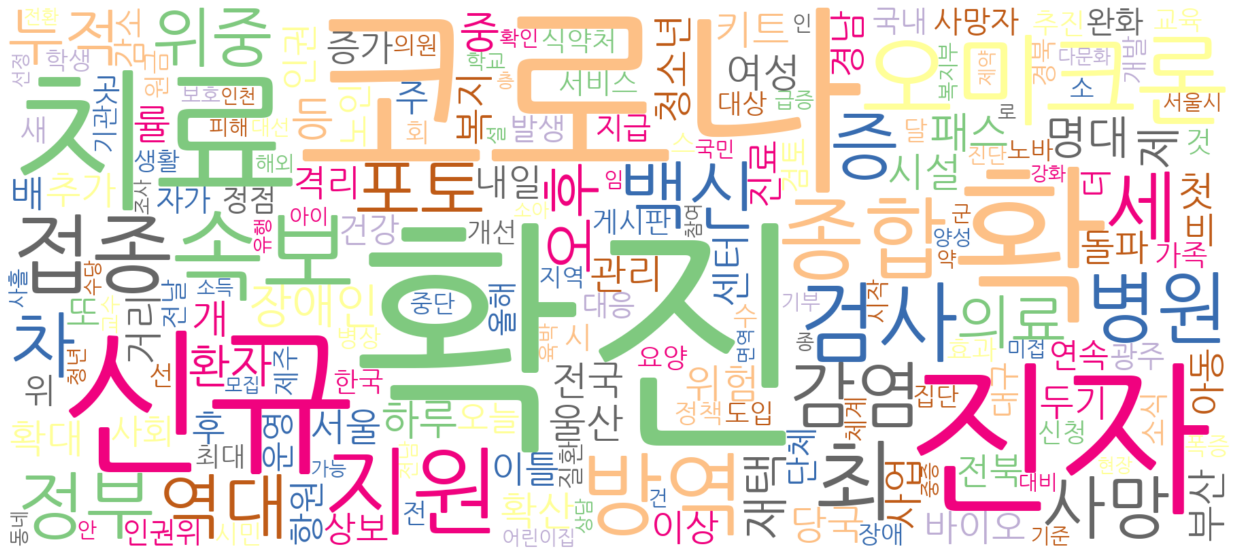

In [40]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumGothic.ttf",
    background_color='white',# 배경 색깔 정하기
    colormap = 'Accent',   # 폰트 색깔 정하기 [위:colormap 참조]
    width = 1800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(dict(counter.most_common()))
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(100, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

### Colormap 참조:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png">

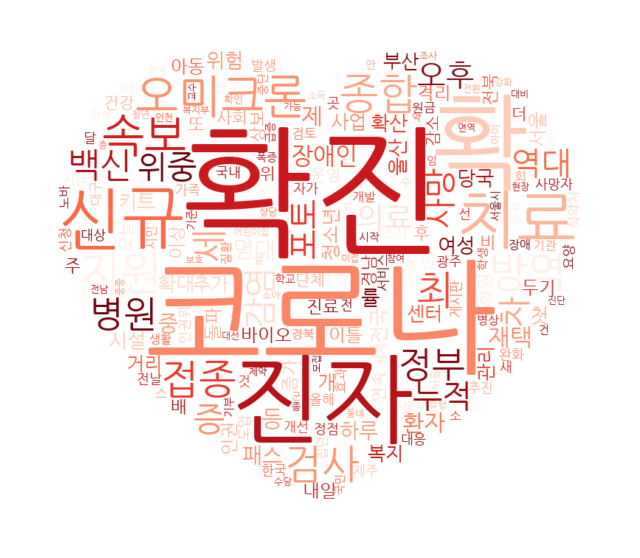

In [41]:
from PIL import Image
import numpy as np
img = Image.open('images/mask_sample/heart.png')
img_array = np.array(img)

wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumGothic.ttf",
    background_color='white',# 배경 색깔 정하기
    colormap = 'Reds',   # 폰트 색깔 정하기 [위:colormap 참조]
    width = 800,
    height = 800,
    mask=img_array,

)

wordcloud_words = wordcloud.generate_from_frequencies(dict(counter.most_common()))
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(20, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()